In [89]:
import nltk
import os
from nltk.corpus.reader.plaintext import PlaintextCorpusReader

corpusdir = '/Users/jaimesantosorozco/nltk_data/speechDataset/' # Directory of corpus.

newcorpus = PlaintextCorpusReader(corpusdir, '.*')

In [90]:
stop_words = set(nltk.corpus.stopwords.words('english'))
stop_words.add(',')
stop_words.add('.')
stop_words.add(':')
stop_words.add('...')
stop_words.add('....')
stop_words.add('"')
stop_words.add('-')
stop_words.add('–')
stop_words.add('?')
stop_words.add('!')
stop_words.add(';')
stop_words.add('--')
stop_words.add('’')
stop_words.add('."')
stop_words.add(',"')
stop_words.add('.”')
stop_words.add('“')
stop_words.add('[')
stop_words.add(']')
stop_words.add('000')
stop_words.add('?"')
stop_words.add('\'')


In [91]:
newcorpus.fileids()

['.DS_Store',
 '1-Martin Luther King-I Have A Dream.txt',
 '10-Lyndon Baines Johnson-Address to a Joint Session of Congress on Voting Legislation.txt',
 '11-Mario Matthew Cuomo-1984 Democratic National Convention Keynote Address.txt',
 '12-Jesse Jackson-1984 Democratic National Convention Address.txt',
 '13-Barbara Charline Jordan-Statement on the Articles of Impeachment .txt',
 '14-General Douglas MacArthur-Farewell Address to Congress.txt',
 '15-Martin Luther King, Jr.-Ive Been to the Mountaintop.txt',
 '16-Theodore Roosevelt-The Man with the Muck-rake.txt',
 '17-Robert F. Kennedy-Remarks on the Assassination of Martin Luther King, Jr..txt',
 '18-Dwight D. Eisenhower-Farewell Address.txt',
 '19-Woodrow Wilson-War Message to Congress.txt',
 '2-John F. Kennedy-Inaugural Address.txt',
 '20-General Douglas MacArthur-Sylvanus Thayer Award Acceptance Address.txt',
 '21-Richard M. Nixon-The Great Silent Majority.txt',
 '22-John F. Kennedy-Ich bin ein Berliner (I am a Berliner).txt',
 '23-Cl

In [92]:
#iterar a travéz de todos los archivos, obtener data
data = []

for i in range(0, len(newcorpus.fileids())):
    if newcorpus.fileids()[i] == '.DS_Store':
        continue
    data.append({'filename':newcorpus.fileids()[i]})
    


In [93]:
allTopWords = {}
allTopWordsArticles = {}
totalSignificantWords = {'filename':[], 'totalWords':[]}
for i in range(0,len(data)):

    fdist = nltk.probability.FreqDist(newcorpus.words(data[i]['filename']))
    newFDist = {}
    count=0
    wordCount = 0
    for key in fdist.keys():
        wordCount += fdist[key]
        contained = False
        for x in stop_words:
            
            if x.upper() == key.upper():
                contained = True

        if contained == False :
            count += 1
            newFDist[key.upper()] = fdist[key]

    fdist = nltk.probability.FreqDist(newFDist)
    top = fdist.most_common(20)

    newTop = {}

    for x in top:
        newTop[x[0]]=x[1]

        if x[0] in allTopWords:
            allTopWords[x[0]] = allTopWords[x[0]] + newTop[x[0]]
        else:
            allTopWords[x[0]] = newTop[x[0]]

    for key in newTop.keys():
        if key in allTopWordsArticles:
            allTopWordsArticles[key] = allTopWordsArticles[key] + 1
        else:
            allTopWordsArticles[key] = 1

    temp = data[i]['filename']
    totalSignificantWords['filename'].append(temp)
    totalSignificantWords['totalWords'].append(count)

    data[i]['topWords'] = newTop
    data[i]['totalSignificantWords'] = totalSignificantWords['totalWords'][i]
    data[i]['totalWords'] = wordCount
 

    # import json
    # xxx = json.dumps(data)


In [94]:
x= nltk.probability.FreqDist(allTopWordsArticles)
x= x.most_common(20)
tableOfRepeats = {'word':[], 'appearsIn':[], 'No.Repetitions':[]}
for i in range(0, len(x)):
    a, b = x[i]
    tableOfRepeats['word'].append(a)
    tableOfRepeats['appearsIn'].append(b+1)
    tableOfRepeats['No.Repetitions'].append(allTopWords[a])


In [95]:

wordsScore = {}
for key in allTopWords.keys():
    wordsScore[key] = allTopWords[key] * allTopWordsArticles[key]

In [96]:
for x in data:
    score = 0
    for key in x['topWords'].keys():
        score += wordsScore[key]
    x['wordScore'] = score

In [97]:
dataClean = data.copy()
for x in dataClean:
    del x['topWords']
    temp = x['filename'].split('-')
    # x['peopleScore'] = int(temp[0]) // 10 + 1
    x['peopleScore'] = x['wordScore'] + x['totalWords'] - x['totalSignificantWords']
    x['author'] = temp[1]
    x['title'] = temp[2].replace('.txt', '')
dataClean

[{'filename': '1-Martin Luther King-I Have A Dream.txt',
  'totalSignificantWords': 479,
  'totalWords': 1877,
  'wordScore': 37820,
  'peopleScore': 39218,
  'author': 'Martin Luther King',
  'title': 'I Have A Dream'},
 {'filename': '10-Lyndon Baines Johnson-Address to a Joint Session of Congress on Voting Legislation.txt',
  'totalSignificantWords': 871,
  'totalWords': 4199,
  'wordScore': 108691,
  'peopleScore': 112019,
  'author': 'Lyndon Baines Johnson',
  'title': 'Address to a Joint Session of Congress on Voting Legislation'},
 {'filename': '11-Mario Matthew Cuomo-1984 Democratic National Convention Keynote Address.txt',
  'totalSignificantWords': 1030,
  'totalWords': 4989,
  'wordScore': 120785,
  'peopleScore': 124744,
  'author': 'Mario Matthew Cuomo',
  'title': '1984 Democratic National Convention Keynote Address'},
 {'filename': '12-Jesse Jackson-1984 Democratic National Convention Address.txt',
  'totalSignificantWords': 1351,
  'totalWords': 5906,
  'wordScore': 1089

In [98]:
import json
import pandas as pd
dataCleanJSON = json.dumps(dataClean)
dataCleanDF = pd.read_json(dataCleanJSON)
dataCleanDF.to_csv('file.csv');


In [99]:
tableOfRepeatsDF = pd.DataFrame(tableOfRepeats)
tableOfRepeatsDF

,word,appearsIn,No.Repetitions
0,PEOPLE,44,721
1,US,44,614
2,MUST,34,496
3,ONE,29,310
4,WOULD,29,480
5,TIME,25,274
6,WORLD,24,311
7,YEARS,23,204
8,AMERICAN,22,254
9,GREAT,21,195


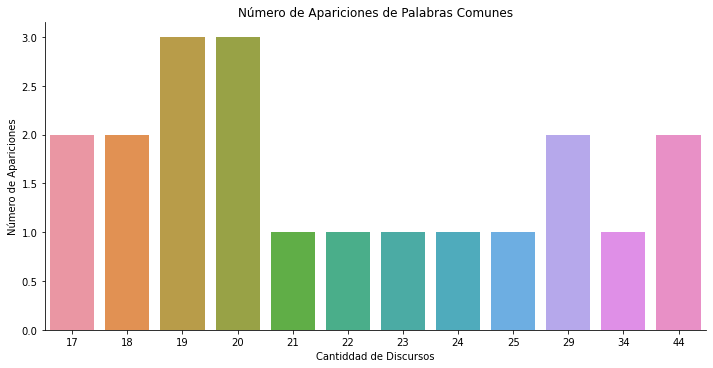

In [100]:
import seaborn as sb

#Deshabilitar los Warnings
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

#Gráfico de la columna "Rating" del DataFrame
sb.catplot('appearsIn', data = tableOfRepeatsDF, kind = 'count', aspect = 2);
plt.title('Número de Apariciones de Palabras Comunes');
plt.xlabel('Cantiddad de Discursos');
plt.ylabel('Número de Apariciones');

KNN

In [101]:
import numpy as np
X = np.array(dataCleanDF[['totalSignificantWords','wordScore','totalWords']])
y = np.array(dataCleanDF['peopleScore'])


In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [103]:
n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [104]:
print('El Nivel de Certeza del Clasificador k-NN en el set de Entrenamiento es: {:.2f}'.format(knn.score(X_train, y_train)*100),"%")
print('El Nivel de Certeza del Clasificador k-NN en el set de Prueba es: {:.2f}'.format(knn.score(X_test, y_test)*100),"%")

El Nivel de Certeza del Clasificador k-NN en el set de Entrenamiento es: 6.67 %
El Nivel de Certeza del Clasificador k-NN en el set de Prueba es: 0.00 %


In [105]:
pred = knn.predict(X_test)

#Mostrar los valores
print("Matriz de Confusión:\n", confusion_matrix(y_test, pred), "\n")
print("Reporte:\n", classification_report(y_test, pred), "\n")

Matriz de Confusión:
 [[0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]] 

Reporte:
               precision    recall  f1-score   support

        5609       0.00      0.00      0.00       1.0
       15121       0.00      0.00      0.00       1.0
       18473       0.00      0.00      0.00       0.0
       18523       0.00      0.00      0.00       1.0
       18531       0.00      0.00      0.00       1.0
       23466       0.00      0.00      0.00       0.0
       33670       0.00      0.00      0.00       1.0
       36501       0.00      0.00      0.00       0.0
       41090       0.00      0.00      0.00       1.0
       48057       0.00      0.00      0.00       0.0
       50096       0.00      0.00      0.00       0.0
       50905       0.00      0.00      0.00       1.0
       52616       0.00      0.00      0.00       0.0
       53116       0.00      0.00      0.00       0.0
       60269       0.00      0.00  

K-Means

In [114]:
import numpy as np
X = np.array(dataCleanDF[['totalSignificantWords','wordScore','totalWords']])
y = np.array(dataCleanDF['peopleScore'])


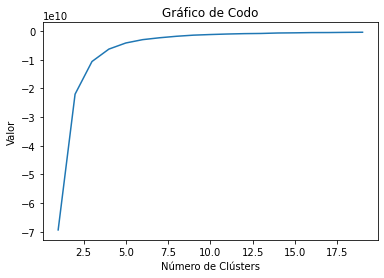

In [115]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

#Determinación del valor K
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

#Gráfico de Codo
plt.plot(Nc,score);
plt.xlabel('Número de Clústers');
plt.ylabel('Valor');
plt.title('Gráfico de Codo');
plt.show();

In [116]:
#Aplicación del Modelo K-Means
kmeans = KMeans(n_clusters = 5).fit(X)
centroids = kmeans.cluster_centers_
print("Los valores de los centroides son: \n", centroids)

Los valores de los centroides son: 
 [[  1146.86666667 111557.8          5812.46666667]
 [   793.875       45340.625        4204.6875    ]
 [   769.11764706  87308.47058824   3615.17647059]
 [   485.2         21105.           1899.8       ]
 [   742.81818182  65151.77272727   3140.36363636]]


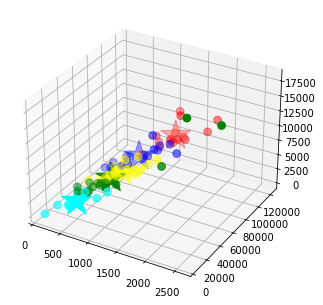

In [117]:
#Etiquetas de cada punto de los datos
from mpl_toolkits.mplot3d import Axes3D
labels = kmeans.predict(X)

#Determinación de los centroides
C = kmeans.cluster_centers_
colores = ['red','green','blue','cyan','yellow']
asignar = []
for row in labels:
    asignar.append(colores[row])

#Gráfico 3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = asignar, s = 60);
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker = '*', c = colores, s = 1000);